In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import moviepy.video.io.ImageSequenceClip
import cmocean
from datetime import datetime, timedelta

# Analyzing Result and Answering Scientific Question

## Scientific question: How do seasonal monsoons in southeast Asia impact ocean stratification?

Due to the data availability and model configuration (start date is January 15th of each year), our model has data from January to November. However, the monsoon season in Southeast Asia are:

- Southwest Monsoon: May to October
- Northeast Monsoon: November to April

With that being said, our data missing out 1 month of the Northeast monsoon season. So, we will use January month as the representative of Northeast Monsoon season and July as the representative of Southeast Monsoon season in our analysis.

In [2]:
# Declare constant for functions
delX = 1/13
delY = 1/14
xgOrigin = 99
ygOrigin = 2
n_rows = 320
n_cols = 300
data_path = '/Volumes/T7/Model_data/'
years = ['2015', '2017']

# Use only those files per our interests
files_type = ['TS_3D_mon_mean', 'TS_surf_daily_mean', 'vel_3D_mon_snap']

# Function to make movie

Here is the function for quick making movies (Inherent from Professor Mike Wood's Lecture 8-1)

In [3]:
# make a list of files for each movie panel
def extract_time(filename):
    # Extract the date part of the filename
    checkpoint = filename[:-4]  # Extracting the date portion
    # Convert to datetime object
    return int(checkpoint)

def get_full_path_list(file_type):
    frames_folder = os.path.join('frames', file_type)
    files = [f for f in os.listdir(frames_folder) if not f.startswith("._")]
    sorted_files = sorted(files, key=extract_time)
    full_paths = [os.path.join(frames_folder, filename) for filename in sorted_files]
    return full_paths

def create_movie(frame_folder, fps):
    full_paths = get_full_path_list(frame_folder)
    # use the ImageSequenceClip module to set up the clip
    clip = moviepy.video.io.ImageSequenceClip.ImageSequenceClip(full_paths, fps=fps)
    
    # write the video to a file
    clip.write_videofile(os.path.join('frames', frame_folder + '.mp4'), fps=fps)

## Circulation Result

Firstly, we will plot and create 2 movies to compare the velocity on the surface level for both 2015 and 2017.

## Plot previews

In [4]:
def create_vel_plot(v_file, year, month):
    # read in the zonal current velocity grid
    v_grid = np.fromfile(v_file, '>f4').reshape((100, n_rows, n_cols))
    
    # plot the meridional current velocity
    fig = plt.figure(figsize = (5,4))
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
    C1 = axs[0].pcolormesh(v_grid[0,:,:], cmap=cmocean.cm.balance, vmin=-1, vmax=1)
    axs[0].set_title('Horizontal Velocity of Month ' + month + ' of ' + year )
    C2 = axs[1].pcolormesh(v_grid[50,:,:], cmap=cmocean.cm.balance, vmin=-1, vmax=1)
    axs[1].set_title('Vertical Velocity of Month ' + month + ' of ' + year )
    
    plt.colorbar(C2, orientation='vertical',
                 label='$\longleftarrow$ Southward   (m/s)   Northward $\longrightarrow$' )
    plt.colorbar(C1, orientation='vertical',
                 label='$\longleftarrow$ Westward   (m/s)   Eastward $\longrightarrow$' )

def get_files_list(year, file_type):
    file_list = list()
    current_folder = os.path.join(data_path, year, file_type)
    files = [
        f for f in os.listdir(current_folder)
        if os.path.isfile(os.path.join(current_folder, f)) and not f.endswith(".meta")
    ]
    for file in sorted(files):
        file_list.append(os.path.join(current_folder, file))
    return file_list

### Velocity in 2015

<Figure size 500x400 with 0 Axes>

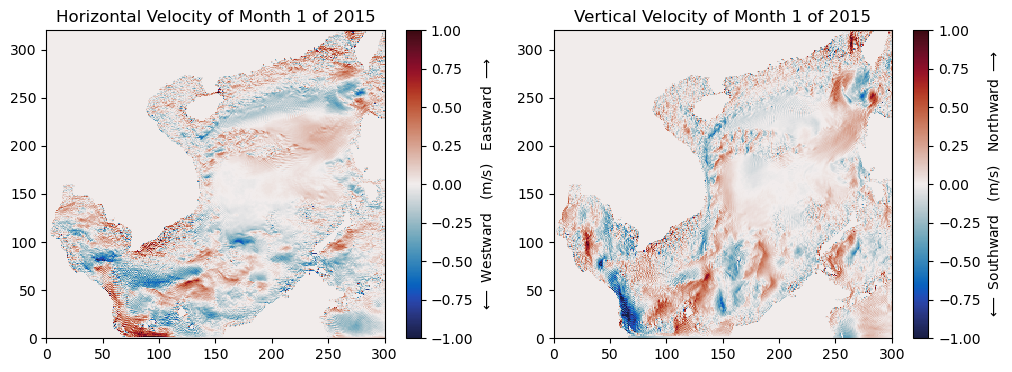

<Figure size 500x400 with 0 Axes>

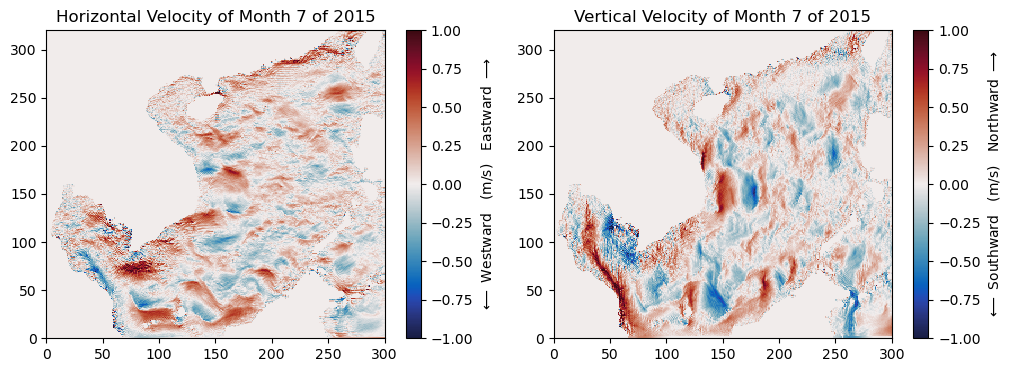

In [5]:
vel_2015 = get_files_list('2015', files_type[2])

create_vel_plot(vel_2015[0], '2015', '1')
create_vel_plot(vel_2015[6], '2015', '7')

### Velocity in 2017

<Figure size 500x400 with 0 Axes>

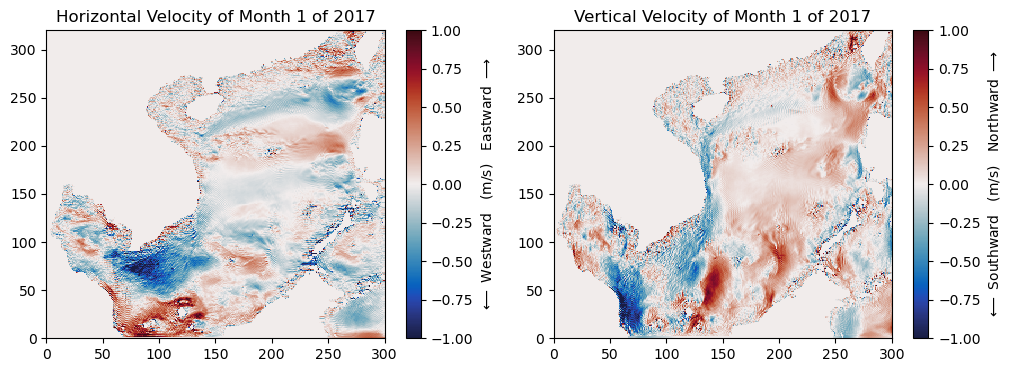

<Figure size 500x400 with 0 Axes>

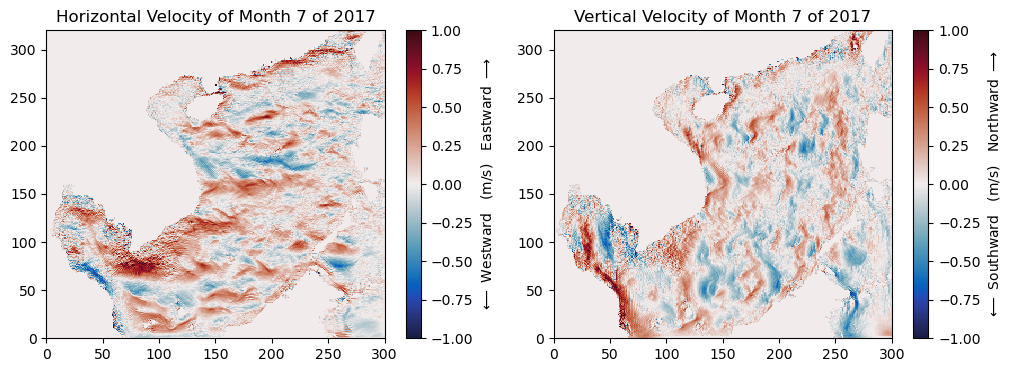

In [6]:
vel_2017 = get_files_list('2017', files_type[2])

create_vel_plot(vel_2017[0], '2017', '1')
create_vel_plot(vel_2017[6], '2017', '7')

In fact, there are no significant different between the months during the El Nino years. However, between 2 monsoons seasons in the La Nina year, we clearly see the different. The January plot shows that the majority of the ocean flow TO Southwest direction, which match the dierction of the Northeast monsoon (monsoon is named by the direction where it comes FROM). So, seasonal monsoons actually impact the circulation of the ocean in South China sea. Moreover, the El Nino and La Nina events impact the flow heavily. 

## TS Surface plots

In the velocity plot, the point at (150, 200), which located in the center of South China Sea has distinctive trend of velocity both horizontally and vertically between January and July. So we will create a timeseries plot of temperature vs salinity to check.

In [7]:
def create__surface_ts_plot(v_file, month, year, row, col): 
    s_grid = np.fromfile(v_file, '>f4').reshape((2, n_rows, n_cols))
    
    fig = plt.figure(figsize = (5,4))
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
    C1 = axs[0].pcolormesh(s_grid[0,:,:], cmap=cmocean.cm.thermal, vmin=0, vmax=30)
    axs[0].plot(col, row, 'w.')
    axs[0].set_title('Temperature in ' + month + ' of ' + year )
    C2 = plt.pcolormesh(s_grid[1,:,:], cmap=cmocean.cm.haline, vmin=0, vmax=35)
    axs[1].plot(col, row, 'w.')
    axs[1].set_title('Salinity in ' + month + ' of ' + year )
    
    plt.colorbar(C1, orientation='vertical',
                 label='$\longleftarrow$ Temperature  ($^o$C) $\longrightarrow$' )
    plt.colorbar(C2, orientation='vertical',
                 label='$\longleftarrow$ Salinity $\longrightarrow$' )

<Figure size 500x400 with 0 Axes>

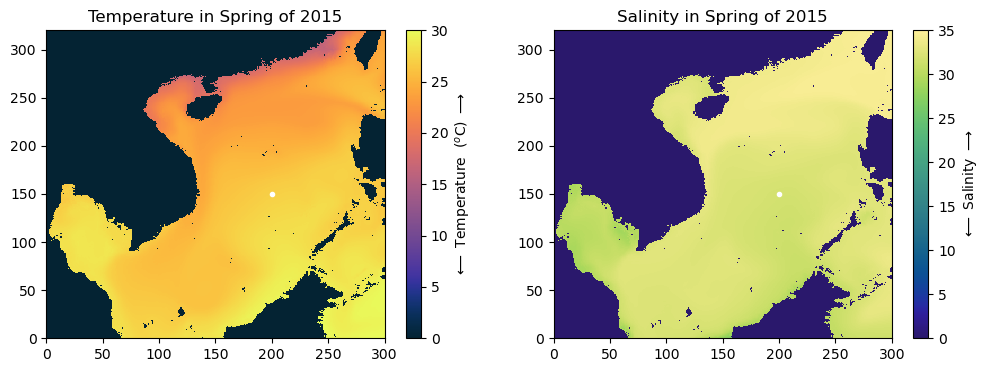

<Figure size 500x400 with 0 Axes>

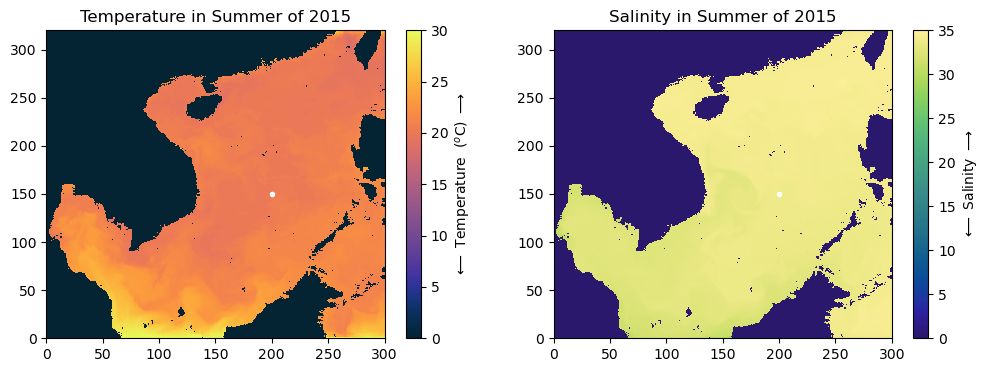

In [8]:
row=150
col=200
salinity_2015_files = get_files_list('2015', files_type[1])
create__surface_ts_plot(salinity_2015_files[0], 'Spring', '2015',  row, col)
create__surface_ts_plot(salinity_2015_files[int(len(salinity_2015_files) * 2/3)], month='Summer', year='2015', row=row, col=col)

Plots are looking great. So, we will use timeseries of temperature vs salinity to compare the development of the stratification

Text(0.5, 0.98, 'Temperature vs Salinity')

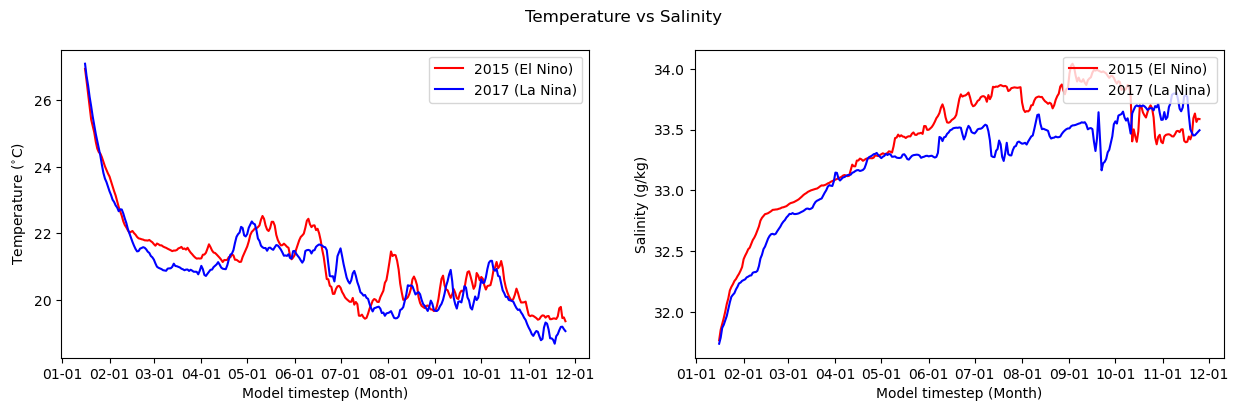

In [9]:
def iter_number_to_date(iter_number,seconds_per_iter=300):
    total_seconds = iter_number*seconds_per_iter
    # Example calculation
    start_date = datetime(month=1, day=15, year=2000)  # Use any arbitrary year
    new_date = start_date + timedelta(seconds=total_seconds)
    
    # Store only month and day in a new datetime object with a default year
    month_day = datetime(month=new_date.month, day=new_date.day, year=2000)
    return(month_day)

timestep_numbers = []
timestep_dates = []

theta_values_temp_2015 = []
theta_values_temp_2017 = []

theta_values_sal_2015 = []
theta_values_sal_2017 = []

for file_name in get_files_list('2015', files_type[1]):
    # get the timestep number
    timestep_number = int(file_name.split('.')[-2])
    timestep_numbers.append(timestep_number)
    timestep_dates.append(iter_number_to_date(timestep_number))
    
    grid = np.fromfile(file_name, '>f4')
    grid = grid.reshape((2,n_rows,n_cols))
    theta_values_temp_2015.append(grid[0,row,col])
    theta_values_sal_2015.append(grid[1,row,col])

for file_name in get_files_list('2017', files_type[1]):

    grid = np.fromfile(file_name, '>f4')
    grid = grid.reshape((2,n_rows,n_cols))
    theta_values_temp_2017.append(grid[0,row,col])
    theta_values_sal_2017.append(grid[1,row,col])
    
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(15,4))
axs[0].plot(timestep_dates, theta_values_temp_2015,'r-', label='2015 (El Nino)')
axs[0].plot(timestep_dates, theta_values_temp_2017,'b-', label='2017 (La Nina)')
axs[1].plot(timestep_dates, theta_values_sal_2015,'r-', label='2015 (El Nino)')
axs[1].plot(timestep_dates, theta_values_sal_2017,'b-', label='2017 (La Nina)')

axs[0].set_ylabel('Temperature ($^{\circ}$C)')
axs[0].set_xlabel('Model timestep (Month)')
axs[0].legend(loc='upper right')
axs[0].xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))

axs[1].set_ylabel('Salinity (g/kg)')
axs[1].set_xlabel('Model timestep (Month)')
axs[1].legend(loc='upper right')
axs[1].xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))

fig.suptitle('Temperature vs Salinity')

There are a lot of things to talk about the stratification here. In the comparison between the 2 models:

- The temperature of the 2 models are similar.
- For salinity, generally the La Nina year tend to have lower salinity compared to the El Nino year. This trend flip in the last part of the timespan.

In theory, the La Nina year should have higher surface salinity because this effect tend to make the ocean temperature decrease, which decrease density and help salt rise up to the surface to increase surface salinity. However, what we see here is that temperature in both events are nearly identical with surface salinity of La Nina year lower than El Nino year. 

However, I suspect that the initial time steps from January to May are not accurate as the model was warming up. So, we will compare the periods before and after October. Before October, it is the Southwest monsoon season. This monsoon is high heat and carry a lot of humidity from the equator. Hence, the temperature during this monsoon will be higher, which will make the density rise and salt to descend into the deep ocean. In El Nino year, the monsoon effect is very low. Hence, we the salinity of this period is higher than during La Nina year, when the monsoons proactively presented in this area. On the other hand, Northeast monsoon season carry the cold from the North without any humidity since it comes from the China Mainland. Hence, it will make the temperature going down and salinity increase. Noted that in this monsoon season during El Nino, we see the salinity goes down instead of increasing. This is unusual and reasons behind this can be due to a lot of rains or there are some events that impact the surface temperature. So, we will need to corporate the precipitation simulation to explain further this unusual.

In conclusion, monsoon seasons and El Nino/La Nina affects the surface stratification and surface circulation of the South China sea heavily.

Extra note: due to the time constraint, I could not have created new initial conditions files for 2017, which may have influenced the similarity in temperature between the 2 models. However, the result is still significant as the external forces are the ones that represent the El Nino and La Nina in the simulation of the model.

### Making frames

In [10]:
ts_surface_2015 = get_files_list('2015', files_type[1])
ts_surface_2017 = get_files_list('2017', files_type[1])

for time_step in range(len(ts_surface_2015)): # both years have the same length
    s_grid_2015 = np.fromfile(ts_surface_2015[time_step], '>f4').reshape((2, n_rows, n_cols))
    s_grid_2017 = np.fromfile(ts_surface_2017[time_step], '>f4').reshape((2, n_rows, n_cols))
    
    fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12,8))
    C1 = axs[0,0].pcolormesh(s_grid_2015[0,:,:], cmap=cmocean.cm.thermal, vmin=0, vmax=30)
    C2 = axs[0,1].pcolormesh(s_grid_2017[0,:,:], cmap=cmocean.cm.thermal, vmin=0, vmax=30)
    
    axs[0,0].set_title('Temperature of 2015')
    axs[0,1].set_title('Temperature of 2017')
    
    C3 = axs[1,0].pcolormesh(s_grid_2015[1,:,:], cmap=cmocean.cm.haline, vmin=0, vmax=35)
    C4 = axs[1,1].pcolormesh(s_grid_2015[1,:,:], cmap=cmocean.cm.haline, vmin=0, vmax=35)
    
    axs[1,0].set_title('Salinity of 2015')
    axs[1,1].set_title('Salinity of 2017')
    
    plt.colorbar(C1, orientation='vertical',
                 label='$\longleftarrow$ Temperature  ($^o$C) $\longrightarrow$' )
    plt.colorbar(C2, orientation='vertical',
                 label='$\longleftarrow$ Temperature  ($^o$C) $\longrightarrow$' )
    plt.colorbar(C3, orientation='vertical',
                 label='$\longleftarrow$ Salinity $\longrightarrow$' )
    plt.colorbar(C4, orientation='vertical',
                 label='$\longleftarrow$ Salinity $\longrightarrow$' )
    
    fig.savefig(os.path.join('frames', 'ts_surface', str(time_step) + '.png'));
    plt.close(fig)

In [11]:
create_movie('ts_surface', 10)

Moviepy - Building video frames/ts_surface.mp4.
Moviepy - Writing video frames/ts_surface.mp4


Moviepy - Done !
Moviepy - video ready frames/ts_surface.mp4


## TS 3D Plots

In addition to the surface stratification, I want to look at stratification change in a depth profile.

In [12]:
def create__depth_ts_plot(v_file, month, year, col): 
    ts_grid = np.fromfile(v_file, '>f4').reshape((100, n_rows, n_cols))
    
    fig = plt.figure(figsize = (5,4))
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
    C1 = axs[0].pcolormesh(ts_grid[:50,:,col], cmap=cmocean.cm.thermal, vmin=0, vmax=30)
    axs[0].set_title('Temperature of Profile at column ' + str(col) + ' during ' + month + ' of ' + year )
    C2 = plt.pcolormesh(ts_grid[50:,:,col], cmap=cmocean.cm.haline, vmin=0, vmax=37)
    axs[1].set_title('Salinity of Profile at column ' + str(col) + ' during ' + month + ' of ' + year )
    
    plt.colorbar(C1, orientation='vertical',
                 label='$\longleftarrow$ Temperature  ($^o$C) $\longrightarrow$' )
    plt.colorbar(C2, orientation='vertical',
                 label='$\longleftarrow$ Salinity $\longrightarrow$' )
    axs[0].invert_yaxis()
    axs[0].set_xlabel('Rows')
    axs[0].set_ylabel('Depth (m)')
    
    axs[1].invert_yaxis()
    axs[1].set_xlabel('Rows')
    axs[1].set_ylabel('Depth (m)')
    # plt.savefig(os.path.join(current_folder, 'Frames', checkpoint + '.png'));
    # plt.close(fig)

<Figure size 500x400 with 0 Axes>

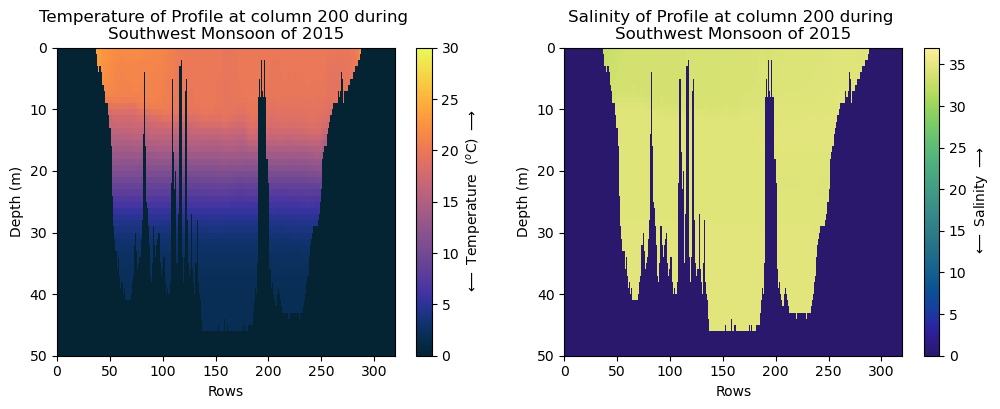

<Figure size 500x400 with 0 Axes>

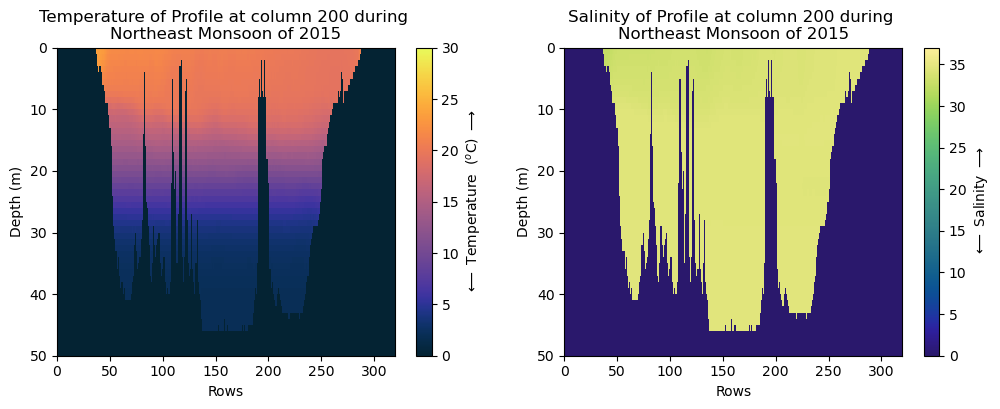

In [13]:
col=200
ts_3d_2015_files = get_files_list('2015', files_type[0])
create__depth_ts_plot(ts_3d_2015_files[7], '\nSouthwest Monsoon', '2015', col)
create__depth_ts_plot(ts_3d_2015_files[10], '\nNortheast Monsoon', '2015', col)


<Figure size 500x400 with 0 Axes>

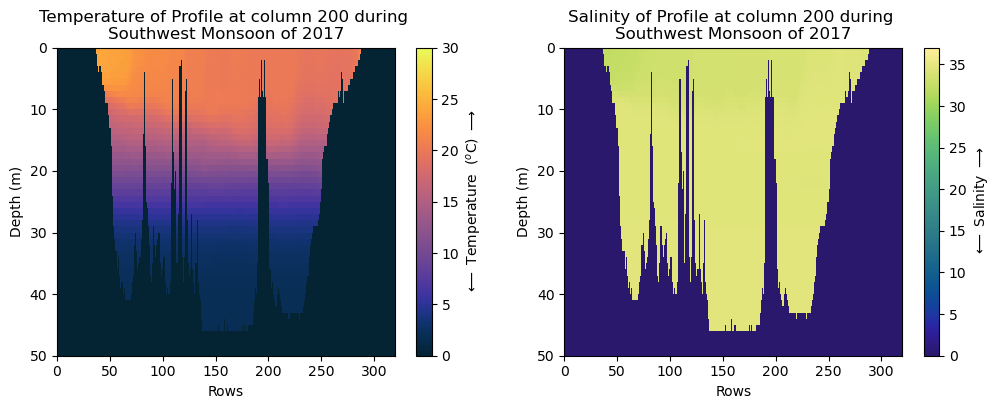

<Figure size 500x400 with 0 Axes>

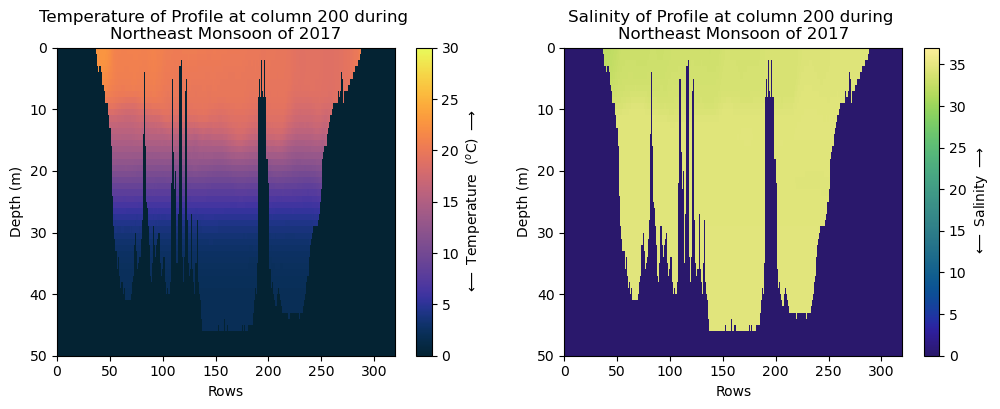

In [14]:
col=200
ts_3d_2017_files = get_files_list('2017', files_type[0])
create__depth_ts_plot(ts_3d_2017_files[7], '\nSouthwest Monsoon', '2017', col)
create__depth_ts_plot(ts_3d_2017_files[10], '\nNortheast Monsoon', '2017', col)

Again there are not a lot of much difference between the 2 years. However, the monsoon seasons only affect the stratification on the surface level. Moreover along the depths, the low depth does not change much. Hence, the result indicates that the La Nina/El Nino as well as monsoon seasons do not affect the stratification at depths.